In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
fuzzy_collective_time_lapse = ctrl.Antecedent(np.arange(0, 11, 1), 'fctl')
fuzzy_start_time_lapse = ctrl.Antecedent(np.arange(0, 11, 1), 'fstl')
fuzzy_peer_text_similarity = ctrl.Antecedent(np.arange(0, 7, 1), 'fpts')
fuzzy_reviewer_text_similarity = ctrl.Antecedent(np.arange(0, 7, 1), 'frts')
fuzzy_suspecious_level = ctrl.Consequent(np.arange(0, 101, 1), 'fsl')

In [4]:
fuzzy_collective_time_lapse.automf(3)
fuzzy_start_time_lapse.automf(3)
fuzzy_peer_text_similarity.automf(3)
fuzzy_reviewer_text_similarity.automf(3)

/home/vipul/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


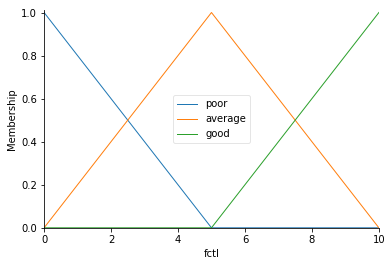

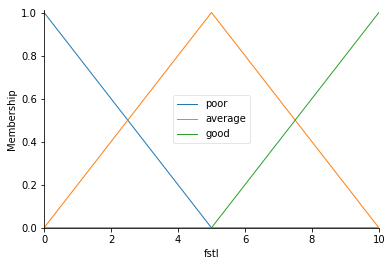

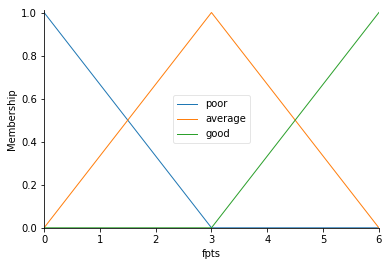

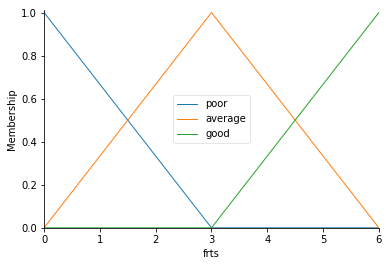

In [5]:
%matplotlib inline
fuzzy_collective_time_lapse.view()
fuzzy_start_time_lapse.view()
fuzzy_peer_text_similarity.view()
fuzzy_reviewer_text_similarity.view()

In [6]:
fuzzy_suspecious_level['ultra_suspicious'] = fuzz.trimf(fuzzy_suspecious_level.universe, [0, 0, 20])
fuzzy_suspecious_level['mega_suspicious'] = fuzz.trimf(fuzzy_suspecious_level.universe, [10, 28, 50])
fuzzy_suspecious_level['immense_suspicious'] = fuzz.trimf(fuzzy_suspecious_level.universe, [28, 50, 70])
fuzzy_suspecious_level['highly_suspicious'] = fuzz.trimf(fuzzy_suspecious_level.universe, [60, 70, 80])
fuzzy_suspecious_level['moderately_suspicious'] = fuzz.trimf(fuzzy_suspecious_level.universe, [70, 80, 90])
fuzzy_suspecious_level['slightly_suspicious'] = fuzz.trimf(fuzzy_suspecious_level.universe, [80, 90, 100])
fuzzy_suspecious_level['feebly_suspicious'] = fuzz.trimf(fuzzy_suspecious_level.universe, [90, 90, 100])

In [7]:
def rule_generator():
    allPermutations=[]
    for i in range(1,4):
        for j in range(1,4):
            for k in range(1,4):
                for l in range(1,4):
                    allPermutations.append([i,j,k,l])
    dict1 = {3:'poor',2:'average',1:'good'}
    dict2 = {1:'poor',2:'average',3:'good'}
    rules = []
    final_container = None
    for x in allPermutations:
        good = 0
        average = 0
        poor = 0
        for y in x:
            if y==3:
                good += 1
            elif y==2:
                average += 1
            elif y==1:
                poor += 1
        if good == 4 :
            final_container = 'ultra_suspicious'
        elif good == 3:
            final_container = 'mega_suspicious'
        elif good == 2:
            final_container = 'immense_suspicious'
        elif good == 1:
            final_container = 'highly_suspicious'
        elif average == 4:
            final_container = 'moderately_suspicious'
        elif average <= 3:
            final_container = 'slightly_suspicious'
        else:
            final_container = 'feebly_suspicious'
        rules.append(ctrl.Rule(fuzzy_collective_time_lapse[ dict1[ x[i] ] ] 
                  | fuzzy_start_time_lapse[ dict1[ x[j] ] ] 
                  | fuzzy_peer_text_similarity[ dict2[ x[k] ] ] 
                  | fuzzy_reviewer_text_similarity[ dict2[ x[l] ] ],
                  fuzzy_suspecious_level[final_container]))
    return rules

In [8]:
membership_rules = rule_generator()

/home/vipul/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


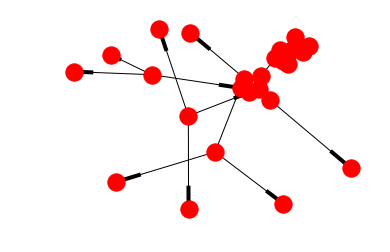

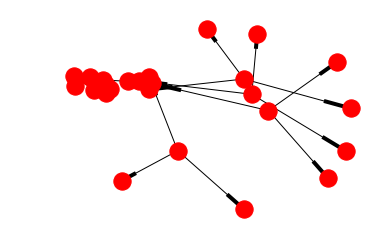

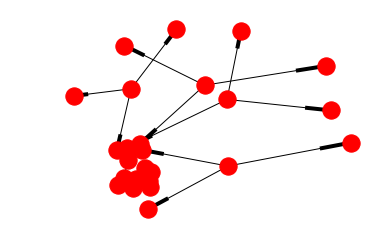

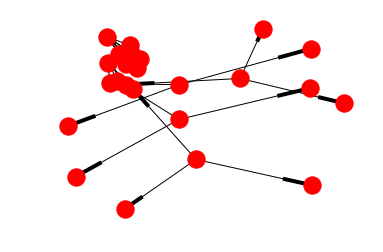

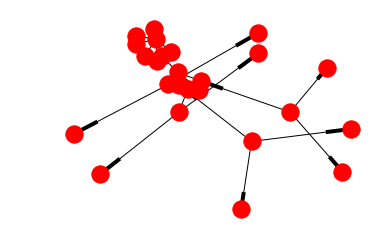

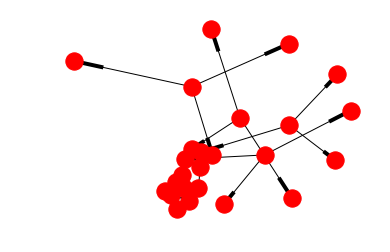

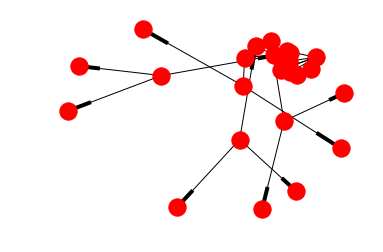

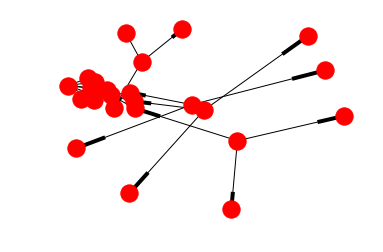

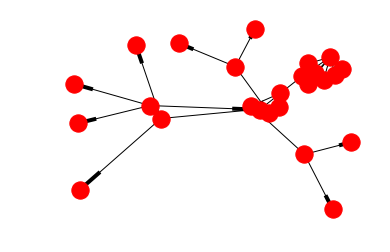

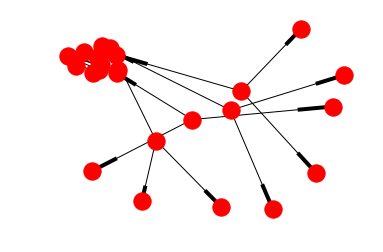

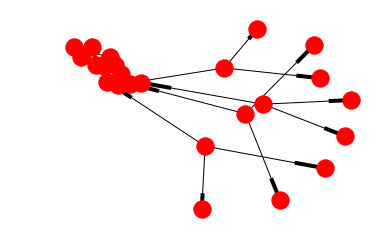

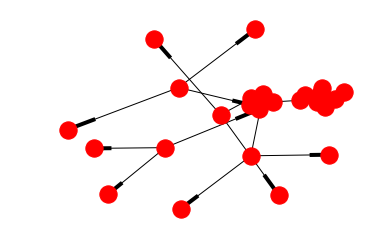

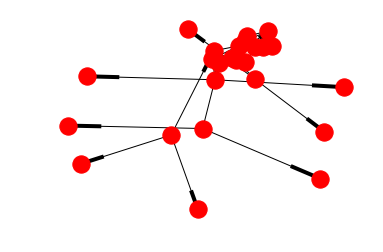

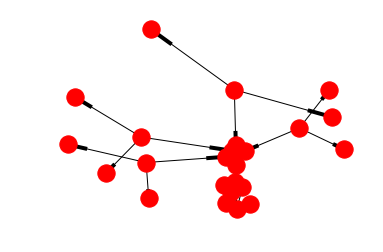

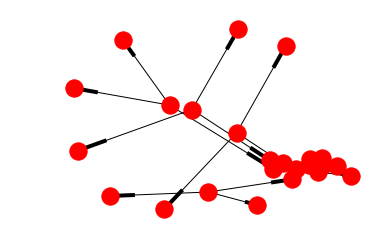

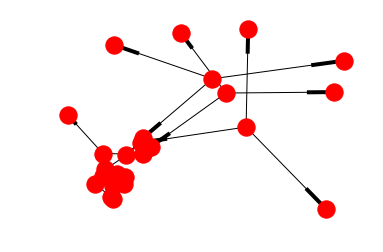

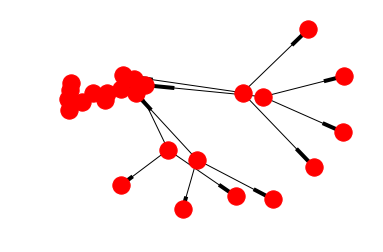

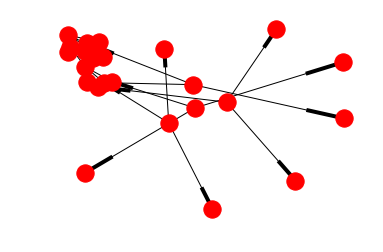

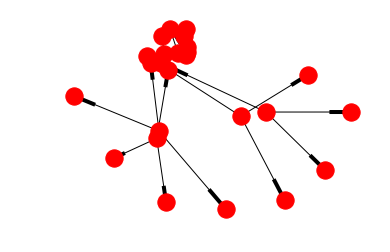

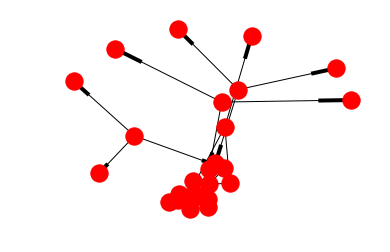

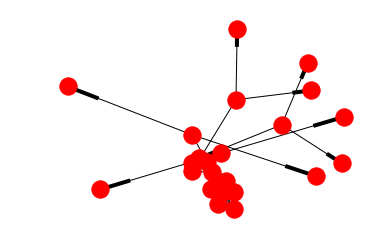

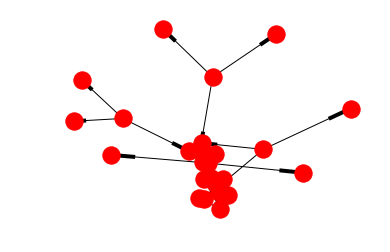

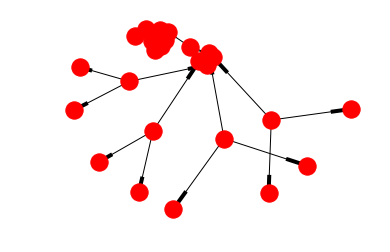

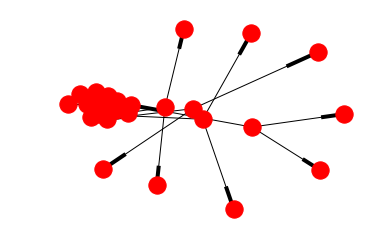

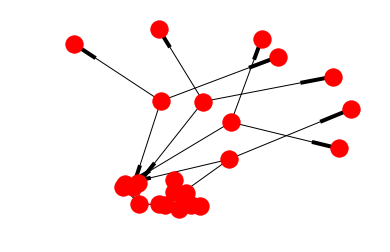

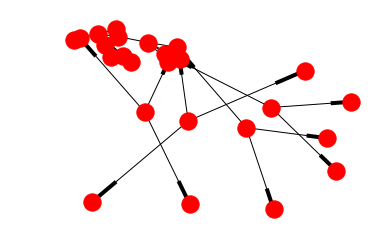

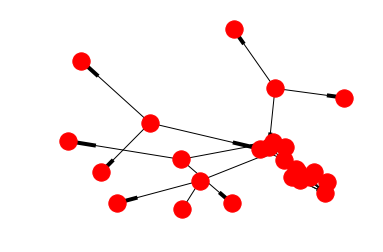

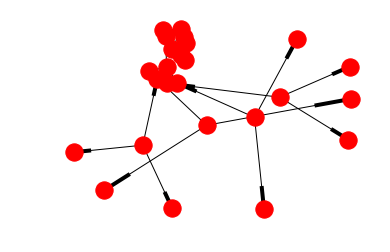

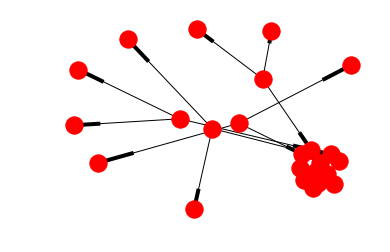

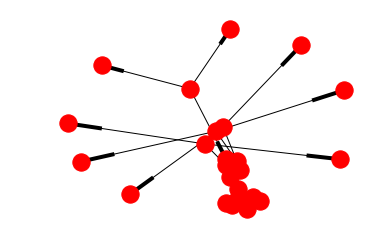

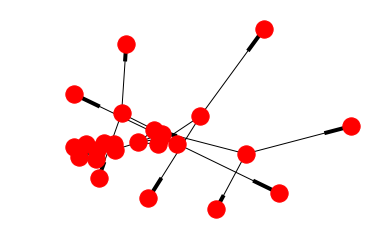

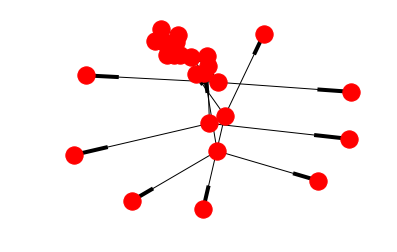

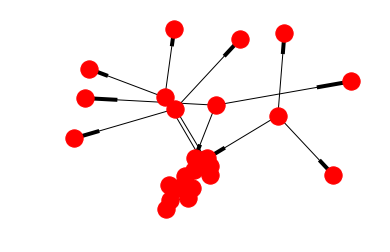

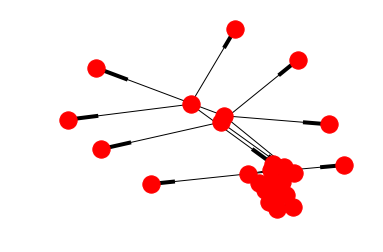

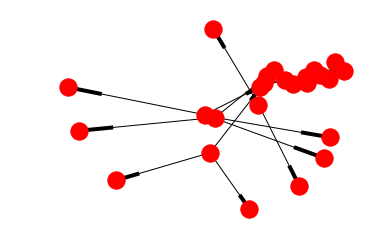

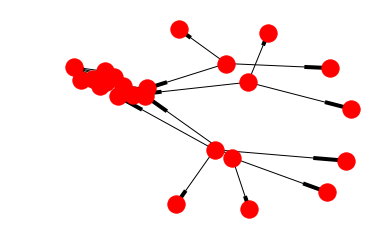

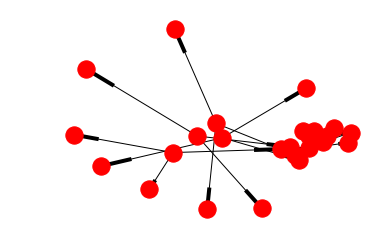

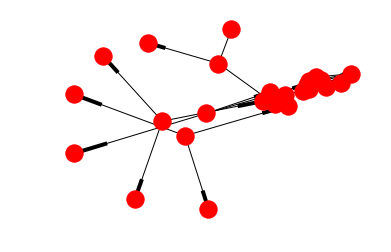

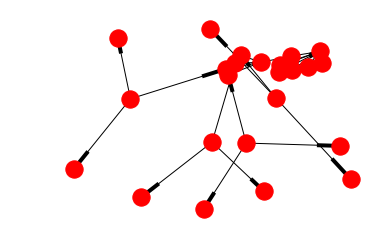

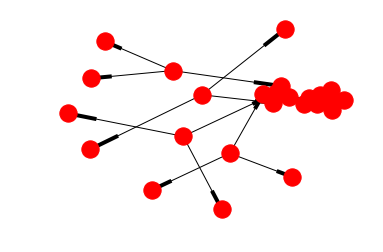

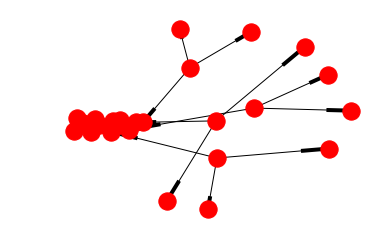

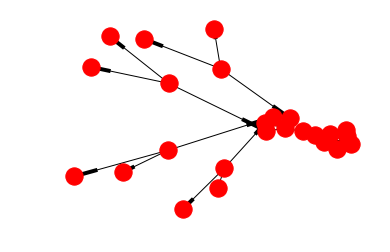

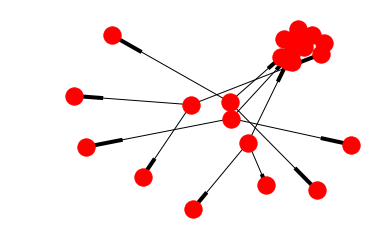

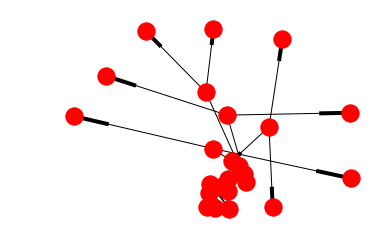

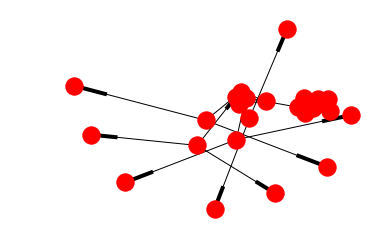

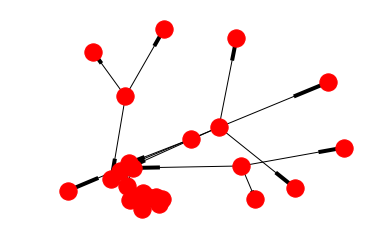

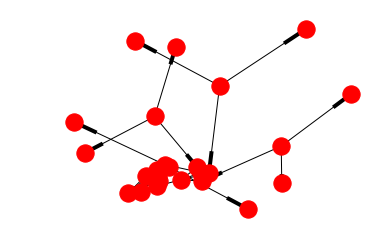

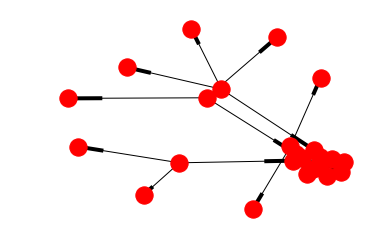

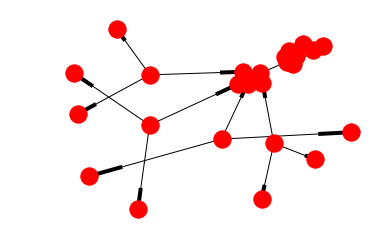

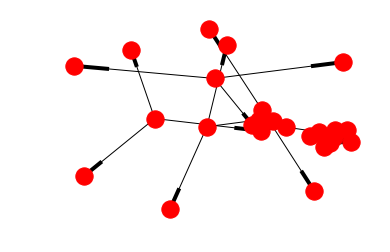

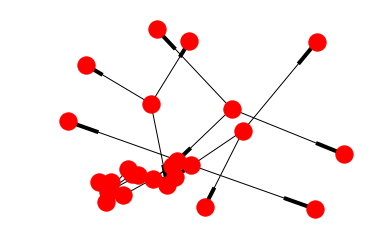

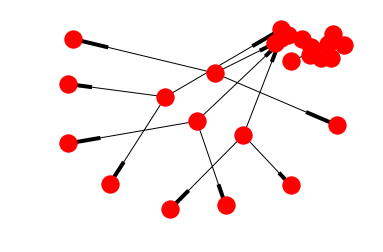

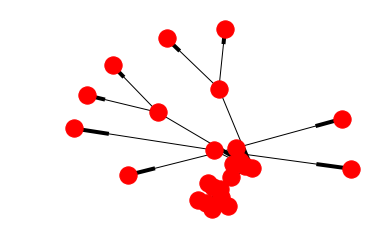

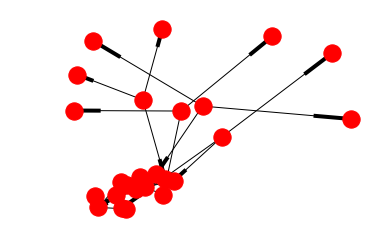

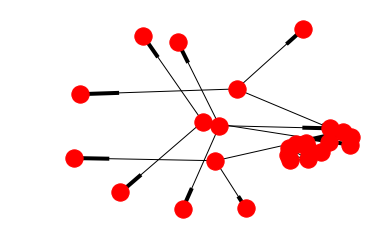

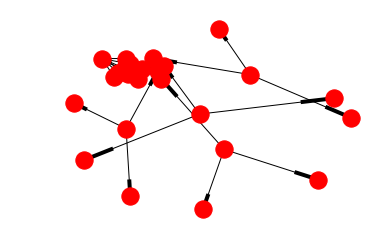

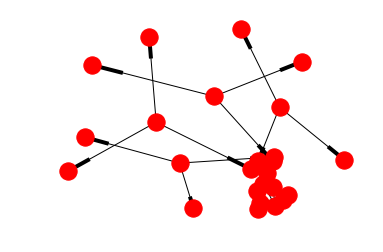

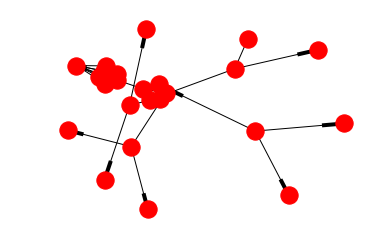

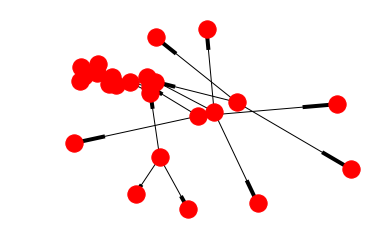

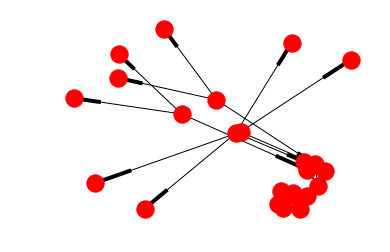

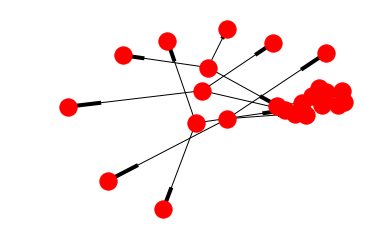

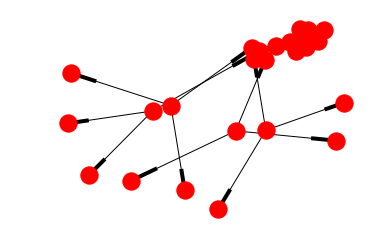

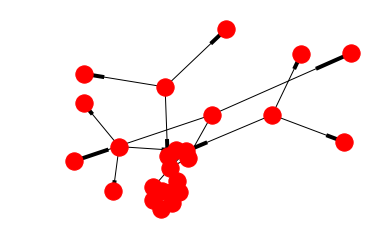

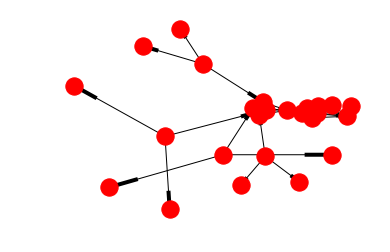

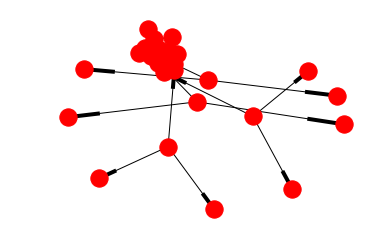

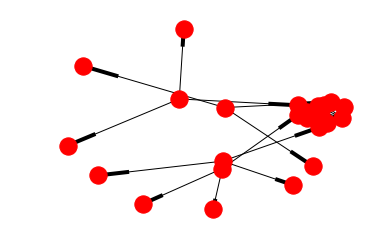

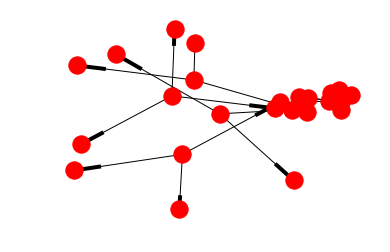

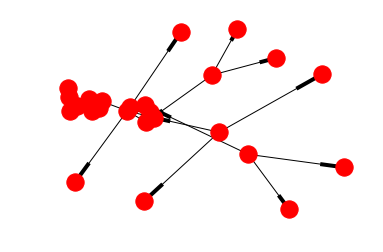

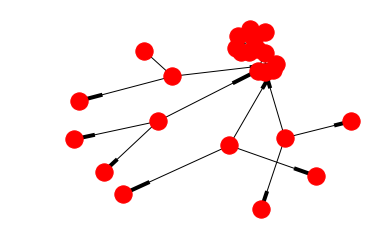

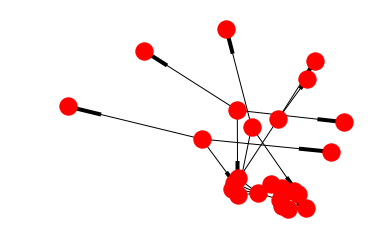

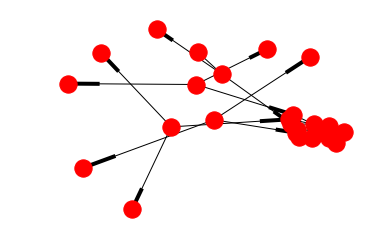

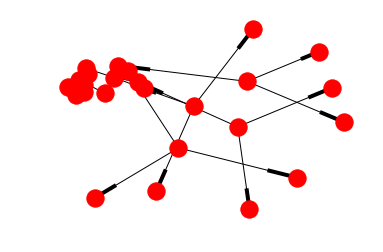

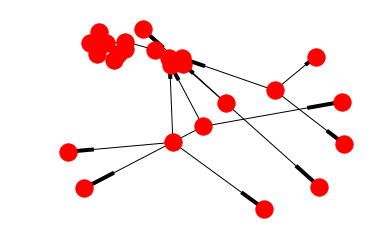

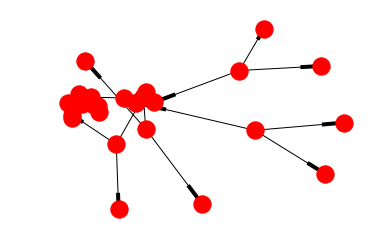

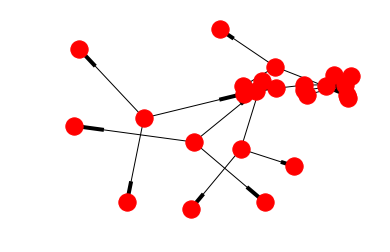

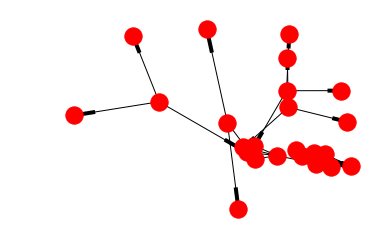

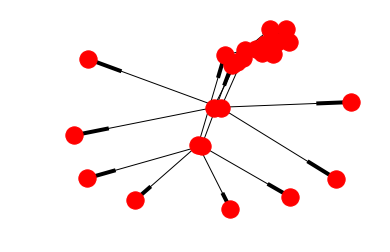

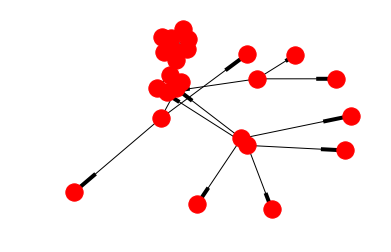

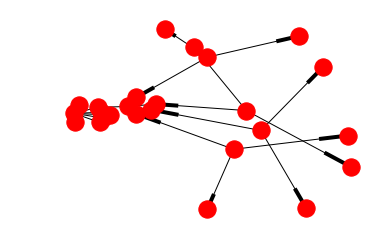

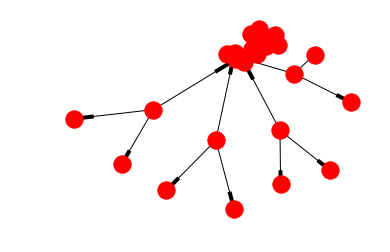

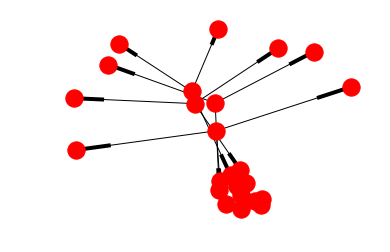

In [9]:
for rule in membership_rules:
    rule.view()

/home/vipul/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


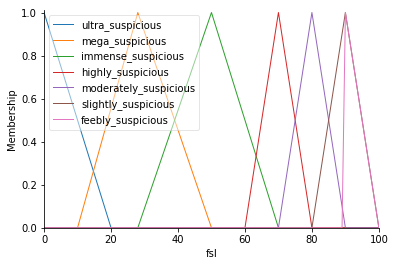

In [10]:
fuzzy_suspecious_level.view()

In [11]:
spam_level = ctrl.ControlSystem(membership_rules)
spamming = ctrl.ControlSystemSimulation(spam_level)

In [12]:
spamming.input['fctl'] = 1.5
spamming.input['fstl'] = 2.0
spamming.input['fpts'] = 1.5
spamming.input['frts'] = 0.5

spamming.compute()

48.9669463966


/home/vipul/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


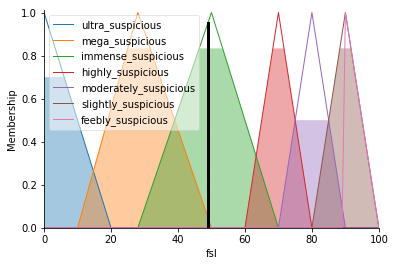

In [13]:
print (spamming.output['fsl'])
fuzzy_suspecious_level.view(sim=spamming)